In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [7]:
df=pd.read_csv("winequalityN.csv")

In [8]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
df.shape

(6497, 13)

In [11]:
set(df['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [12]:
set(df['type'])

{'red', 'white'}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [14]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [15]:
df.shape

(6497, 13)

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df.shape

(6463, 13)

In [19]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
df_encoded = pd.get_dummies(df.type)

In [21]:
df_encoded.head()

,red,white
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
df=pd.concat([df_encoded, df], axis=1)

In [23]:
df.columns

Index(['red', 'white', 'type', 'fixed acidity', 'volatile acidity',
       'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [24]:
del df['type']

In [25]:
df.columns

Index(['red', 'white', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

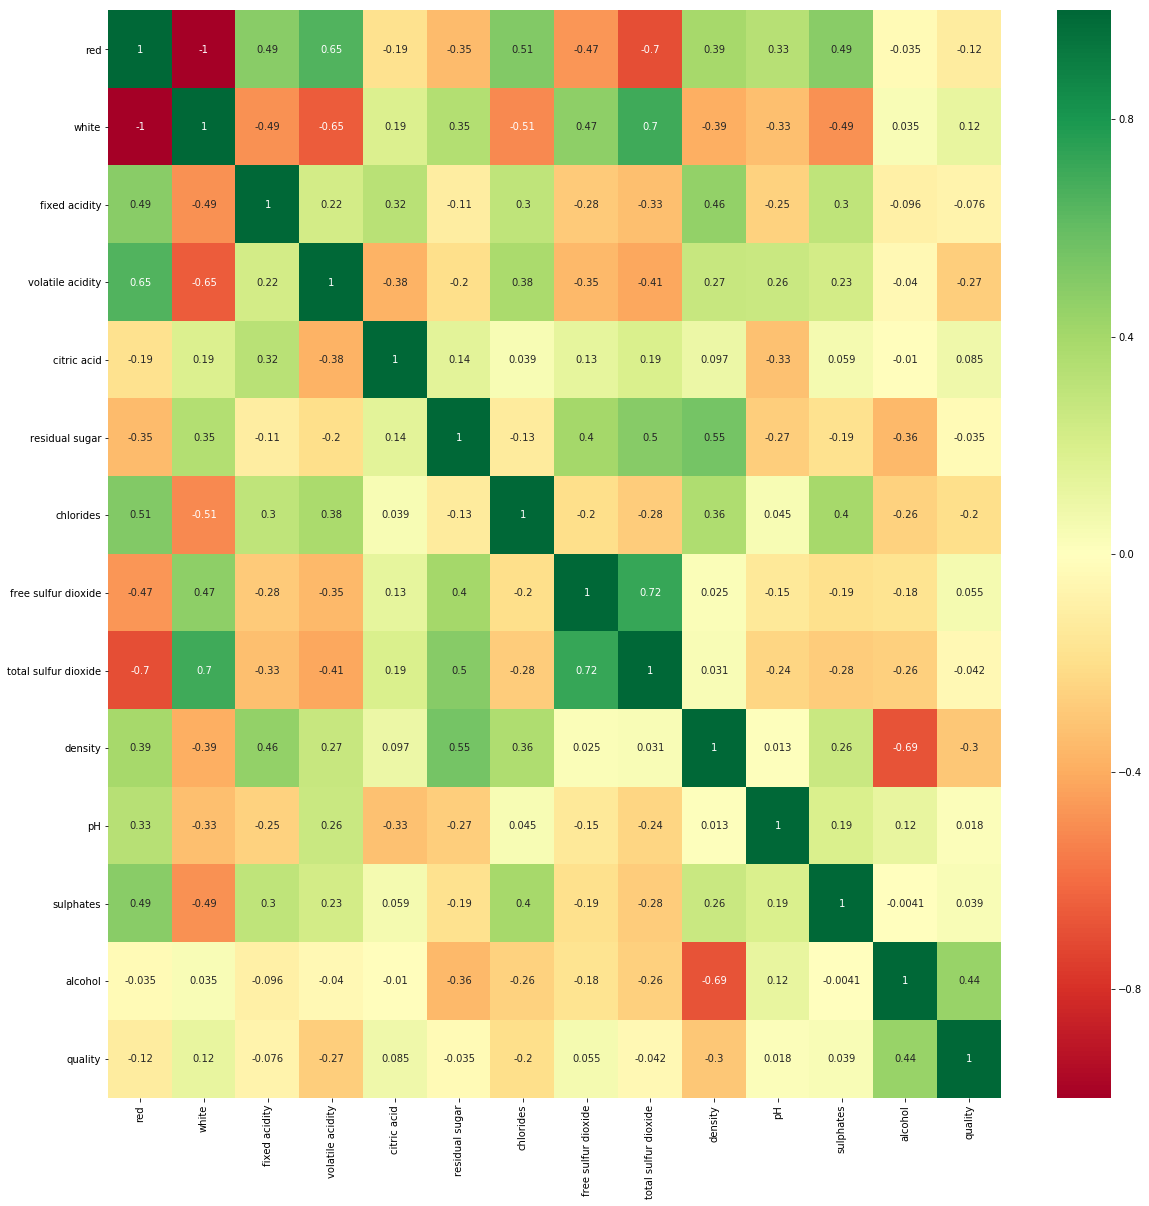

In [28]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
print (corrmat['quality'].sort_values(ascending=False), '\n')

quality                 1.000000
alcohol                 0.444637
white                   0.119185
citric acid             0.084926
free sulfur dioxide     0.054924
sulphates               0.039054
pH                      0.018403
residual sugar         -0.034654
total sulfur dioxide   -0.041598
fixed acidity          -0.076174
red                    -0.119185
chlorides              -0.200553
volatile acidity       -0.266677
density                -0.304447
Name: quality, dtype: float64 



In [34]:
X=df[list(df.columns)[:-1]]
y=df['quality']

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [36]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [38]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Parameters','Score']  #naming the dataframe columns

In [39]:
featureScores

,Parameters,Score
0,red,88.108694
1,white,28.820770
2,fixed acidity,11.011943
3,volatile acidity,42.564983
4,citric acid,3.630149
5,residual sugar,220.115243
6,chlorides,6.386014
7,free sulfur dioxide,891.417922
8,total sulfur dioxide,1240.139794
9,density,0.006528


In [40]:
print(featureScores.nlargest(7,'Score'))  #print 7 best features

              Parameters        Score
8   total sulfur dioxide  1240.139794
7    free sulfur dioxide   891.417922
5         residual sugar   220.115243
12               alcohol   200.627560
0                    red    88.108694
3       volatile acidity    42.564983
1                  white    28.820770


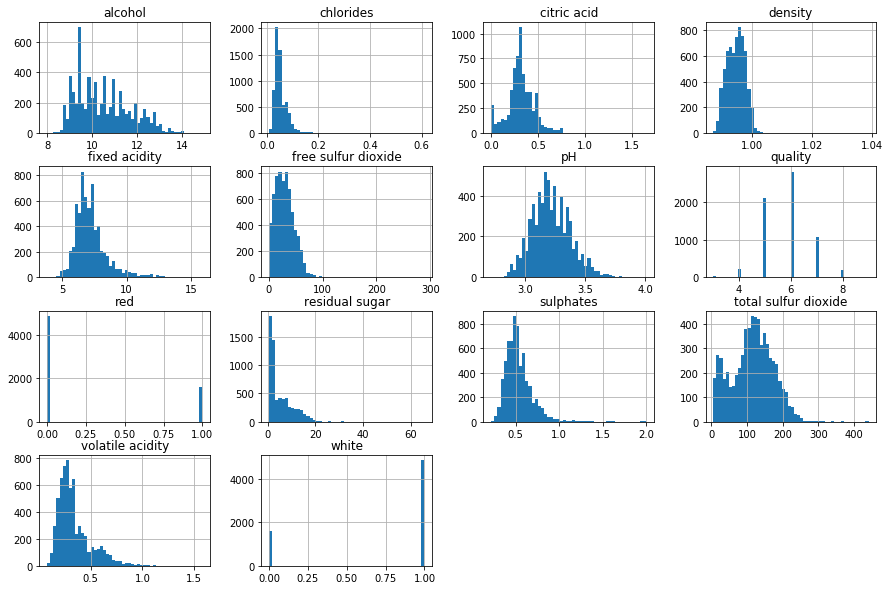

In [41]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

In [96]:
features=['total sulfur dioxide','free sulfur dioxide','residual sugar','alcohol','red','volatile acidity','white']

In [116]:
X = df[features] # Features
y = df.quality # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)
# Create Decision Tree classifer object
clf = RandomForestClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6664603960396039


/home/yash/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6664603960396039


In [121]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   3,   3,   2,   1,   0],
       [  1,   8,  26,  13,   1,   0],
       [  1,   7, 399, 121,   7,   0],
       [  0,   3, 134, 506,  54,   2],
       [  0,   0,  23,  97, 142,   6],
       [  0,   0,   2,  22,  10,  22]])

Text(0.5, 257.44, 'Predicted label')

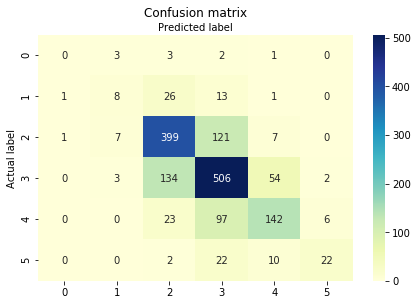

In [122]:
class_names=[3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6664603960396039
